In [1]:
import os
import numpy as np
from random import sample, seed
seed(42)
np.random.seed(42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger

# Keras imports
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.utils import np_utils
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import classification_report

import inf619utils
from inf619utils import plot_confusion

Using TensorFlow backend.


In [2]:
#Read our dataset in batches
def getDatasetLabels(dataset,nbClasses=10,shuffle=False):
    fileNames = dataset
    if shuffle == True:
        imagePaths = sample(fileNames.keys(), len(fileNames))
        #print(imagePaths)
    else:
        imagePaths = list(fileNames.keys())
        #print(imagePaths)
            
    labelList = []

    #loop of one epoch
    for idx in list(range(len(imagePaths))):
        label = np_utils.to_categorical(inf619utils.getLabelFromImgName(imagePaths[idx], dataset), nbClasses)

        labelList.append(label)

    return labelList

In [3]:
datasetDir = "./Dataset"
nbClasses = 10

train_files = {}
val_files = {}
test_files = {}

train_files, val_files, test_files = inf619utils.splitData(datasetDir, nbClasses)

In [4]:
trainSetSize = inf619utils.getDatasetSize(train_files)
valSetSize = inf619utils.getDatasetSize(val_files)
testSetSize = inf619utils.getDatasetSize(test_files)

print("# images in Train set: ", trainSetSize)
print("# images in Val set: ", valSetSize)
print("# images in Test set: ", testSetSize)

# images in Train set:  1242
# images in Val set:  309
# images in Test set:  511


In [5]:
test_labels = getDatasetLabels(test_files)

# Load SqueezeNet Model and Plot Confusion Matrix

In [30]:
keras_model_file = 'squeezenet_sgd_986.h5'

input_shape = (100,100,3)

batch_size=1

In [31]:
model = load_model(keras_model_file)

In [32]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 49, 49, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 49, 49, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 24, 24, 64)   0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/sque

In [8]:
#Criação do generator p/ o conjunto de teste
testGenerator_resnet = inf619utils.loadDatasetInBatches(test_files, input_shape=input_shape, batch_size=batch_size, nbClasses=nbClasses, shaffle=False)

#Teste
metrics = model.evaluate_generator(testGenerator_resnet, 
                                   steps=int(testSetSize/batch_size), 
                                   verbose=1)

print("Test Loss SqueezeNet---> ", metrics[0])
print("Test Accuracy SqueezeNet---> ", metrics[1])    #Test is balanced, so Acc is normalized

511/511 [==============================] - 6s 12ms/step
Test Loss SqueezeNet--->  0.057626310284735534
Test Accuracy SqueezeNet--->  0.9843444227005871


In [9]:
batch_size=1
#Criação do generator p/ o conjunto de teste
testGenerator = inf619utils.loadDatasetInBatches(test_files, input_shape=input_shape, batch_size=batch_size, nbClasses=nbClasses, shaffle=False)

#Teste
y_pred = model.predict_generator(testGenerator, 
                                   steps=int(testSetSize/batch_size), 
                                   verbose=1)

511/511 [==============================] - 4s 8ms/step


In [10]:
predicted_classes = np.argmax(y_pred, axis=1)

In [11]:
true_classes = np.argmax(test_labels, axis=1)

In [12]:
print(len(true_classes), len(predicted_classes))

511 511


Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      1.00      1.00        51
           2       0.98      1.00      0.99        51
           3       1.00      0.96      0.98        51
           4       1.00      1.00      1.00        51
           5       0.98      1.00      0.99        51
           6       1.00      1.00      1.00        51
           7       0.98      0.96      0.97        51
           8       0.96      0.92      0.94        52
           9       0.96      1.00      0.98        51

   micro avg       0.98      0.98      0.98       511
   macro avg       0.98      0.98      0.98       511
weighted avg       0.98      0.98      0.98       511

Normalized confusion matrix
[[100.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.   100.     0.     0.     0.    

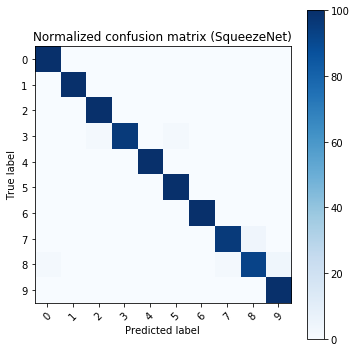

In [14]:
plot_confusion(true_classes, predicted_classes, "SqueezeNet")

In [15]:
del model

# Load MobileNet Model and Plot Confusion Matrix

In [16]:
keras_model_file = 'mobilenetv2_adam_90.h5'

input_shape = (224,224,3)

batch_size=1

In [17]:
model = load_model(keras_model_file)

In [18]:
#Criação do generator p/ o conjunto de teste
testGenerator_resnet = inf619utils.loadDatasetInBatches(test_files, input_shape=input_shape, batch_size=batch_size, nbClasses=nbClasses, shaffle=False)

#Teste
metrics = model.evaluate_generator(testGenerator_resnet, 
                                   steps=int(testSetSize/batch_size), 
                                   verbose=1)

print("Test Loss MobileNetV2---> ", metrics[0])
print("Test Accuracy MobileNetV2---> ", metrics[1])    #Test is balanced, so Acc is normalized

511/511 [==============================] - 22s 43ms/step
Test Loss MobileNetV2--->  0.22024844198922439
Test Accuracy MobileNetV2--->  0.9315068493150684


In [19]:
batch_size=1
#Criação do generator p/ o conjunto de teste
testGenerator = inf619utils.loadDatasetInBatches(test_files, input_shape=input_shape, batch_size=batch_size, nbClasses=nbClasses, shaffle=False)

#Teste
y_pred = model.predict_generator(testGenerator, 
                                   steps=int(testSetSize/batch_size), 
                                   verbose=1)

511/511 [==============================] - 20s 39ms/step


In [20]:
predicted_classes = np.argmax(y_pred, axis=1)

In [21]:
true_classes = np.argmax(test_labels, axis=1)

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.94      0.98      0.96        51
           2       0.92      0.88      0.90        51
           3       0.96      0.96      0.96        51
           4       0.94      0.86      0.90        51
           5       0.96      1.00      0.98        51
           6       0.86      0.86      0.86        51
           7       0.90      0.92      0.91        51
           8       0.89      0.90      0.90        52
           9       0.94      0.94      0.94        51

   micro avg       0.93      0.93      0.93       511
   macro avg       0.93      0.93      0.93       511
weighted avg       0.93      0.93      0.93       511

Normalized confusion matrix
[[100.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    98.04   1.96   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     5.88  88.24   0.     0.     0.    

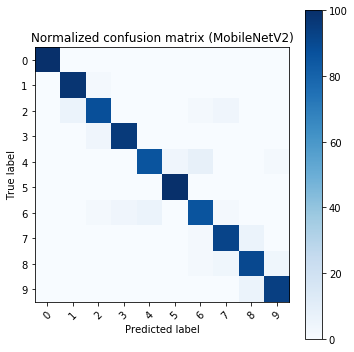

In [22]:
plot_confusion(true_classes, predicted_classes, "MobileNetV2")

In [23]:
del model

# Load ResNet50 Model and Plot Confusion Matrix

In [24]:
keras_model_file = 'resnet_adam_90.h5'

input_shape = (224,224,3)

batch_size=1

In [25]:
model = load_model(keras_model_file)

In [26]:
#Criação do generator p/ o conjunto de teste
testGenerator_resnet = inf619utils.loadDatasetInBatches(test_files, input_shape=input_shape, batch_size=batch_size, nbClasses=nbClasses, shaffle=False)

#Teste
metrics = model.evaluate_generator(testGenerator_resnet, 
                                   steps=int(testSetSize/batch_size), 
                                   verbose=1)

print("Test Loss ResNet50---> ", metrics[0])
print("Test Accuracy ResNet50---> ", metrics[1])    #Test is balanced, so Acc is normalized

511/511 [==============================] - 61s 120ms/step
Test Loss ResNet50--->  0.30826936938250626
Test Accuracy ResNet50--->  0.9080234833659491


In [27]:
predicted_classes = np.argmax(y_pred, axis=1)

In [28]:
true_classes = np.argmax(test_labels, axis=1)

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.94      0.98      0.96        51
           2       0.92      0.88      0.90        51
           3       0.96      0.96      0.96        51
           4       0.94      0.86      0.90        51
           5       0.96      1.00      0.98        51
           6       0.86      0.86      0.86        51
           7       0.90      0.92      0.91        51
           8       0.89      0.90      0.90        52
           9       0.94      0.94      0.94        51

   micro avg       0.93      0.93      0.93       511
   macro avg       0.93      0.93      0.93       511
weighted avg       0.93      0.93      0.93       511

Normalized confusion matrix
[[100.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    98.04   1.96   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     5.88  88.24   0.     0.     0.    

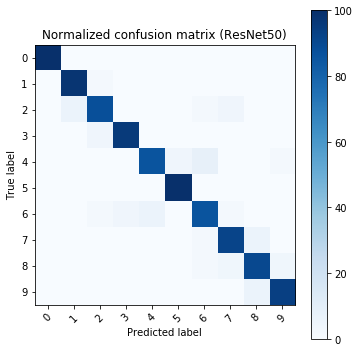

In [29]:
plot_confusion(true_classes, predicted_classes, "ResNet50")

In [ ]:
del model